# Object detection with Detectron2

![](https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg)

## 1) Install detectron2 (if running on Colab with GPU enabled)

Check torch and cuda version then install the correponding pre-built detectron2: https://detectron2.readthedocs.io/en/latest/tutorials/install.html

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.10.0+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 790 kB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 74 kB 4.5 MB/s 
     |████████████████████████████████| 147 kB 72.1 MB/s 
     |████████████████████████████████| 130 kB 73.2 MB/s 
     |████████████████████████████████| 843 kB 59.3 MB/s 
     |████████████████████████████████| 749 kB 77.2 MB/s 
     |████████████████████████████████| 596 kB 53.0 MB/s 
     |████████████████████████████████| 112 kB 77.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61211 sha256=43813403b3b8aabb5cd25555df1a82f23e64ec8481993c5480cf71ba64fa32f3
  Stored in directory: /root/.cache/pip/wheels/df/f4/b8/7b5df8b6722f4c72315ce70c31aa693e00cef6a5056149bd28
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=be4

## 2) Install detectron2 in local (if not using Colab)

Install Detectron2 in Windows, Linux with Anaconda and GPU-enabled:

https://medium.com/@yogeshkumarpilli/how-to-install-detectron2-on-windows-10-or-11-2021-aug-with-the-latest-build-v0-5-c7333909676f

https://medium.com/@sujoydebnath.92/installing-detectron2-with-anaconda-and-cuda-on-linux-7b710663326c

https://anaconda.org/conda-forge/detectron2 


Installing Detectron2 natively for Mac M1 Pro / Apple silicon (use Miniforge) (tested):

https://medium.com/@hakon.hukkelas/installing-detectron2-natively-for-mac-m1-pro-apple-silicon-a89517f1c913 

## 3) Inference with pre-trained model

#### Import packages

In [3]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

We first need to download a image to make predictions on.

In [4]:
# !wget https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg -O oxford_street.jpg
import requests

image_url = "https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg"
img_data = requests.get(image_url).content
with open('oxford_street.jpg', 'wb') as handler:
    handler.write(img_data)

import os
os.stat('oxford_street.jpg')

os.stat_result(st_mode=33188, st_ino=3407895, st_dev=36, st_nlink=1, st_uid=0, st_gid=0, st_size=189067, st_atime=1649997069, st_mtime=1649997069, st_ctime=1649997069)

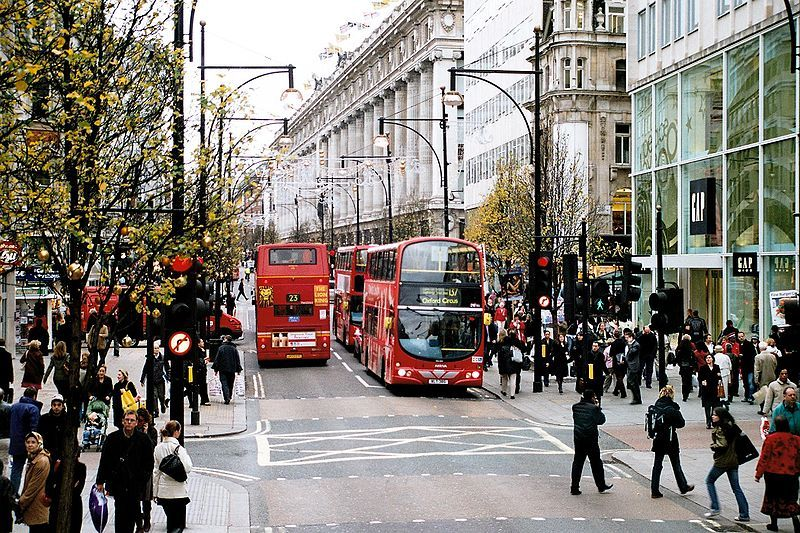

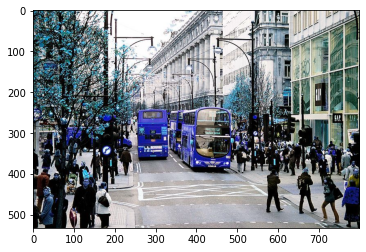

In [5]:
%matplotlib inline
im = cv2.imread("./oxford_street.jpg")
plt.imshow(im)

from IPython.display import Image
Image(filename='oxford_street.jpg') 

#### Import the model and the config

Your turn to work now ! 

- for example, you can choose Faster_rcnn pretrained (its signature is `"COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"` in the detectron model zoo)

In [6]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(...))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(...)
# cfg.MODEL.DEVICE = 'cuda'

In [7]:
# Generate model and Create predictor
predictor = ...

model_final_f6e8b1.pkl: 243MB [00:05, 46.6MB/s]                           


In [8]:
# Make prediction
outputs = ...

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


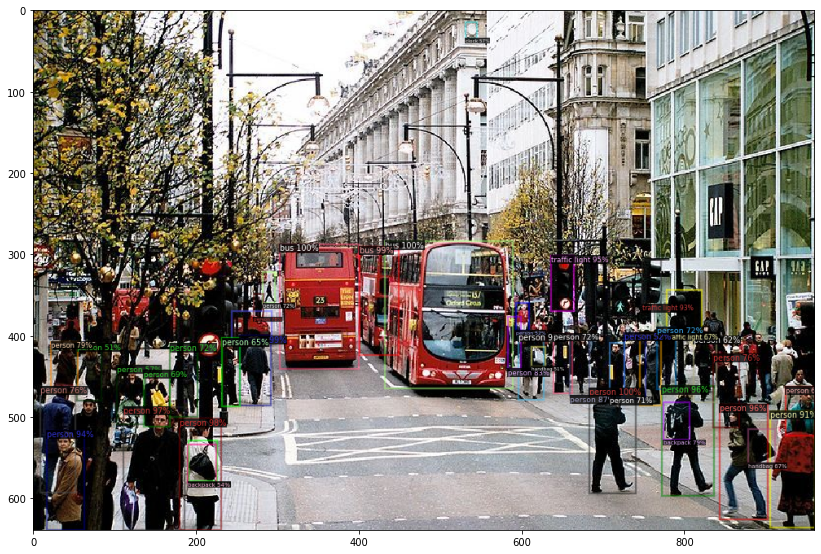

In [9]:
# Visualize the bounding boxes on the image
v = Visualizer(...)
v = v.draw_instance_predictions(...)
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

**\[BONUS\]** Feel free to :
- Test the faster-RNN we just used on other images of your choosing
- Test some of the other algorithms available in the [model zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md) and see how they perform